In [246]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import csv
from collections import Counter
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
np.set_printoptions(suppress=True)

### 1. Channel level data analysis

In [247]:
# import Data
df_channel = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 985 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    int64  
 4   category                                 949 non-null    object 
 5   Title                                    985 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

### 1.1 Data Preprocessing

In [248]:
# Data exploration
df_channel.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [249]:
## resetting the index
df_channel.reset_index(drop= True, inplace= True)

In [250]:
#Replacing '_' in the columns and changin it into title case
df_channel.columns = df_channel.columns = df_channel.columns.str.replace('_', ' ').str.title()
df_channel.columns

Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country', 'Abbreviation', 'Channel Type',
       'Video Views Rank', 'Country Rank', 'Channel Type Rank',
       'Video Views For The Last 30 Days', 'Lowest Monthly Earnings',
       'Highest Monthly Earnings', 'Lowest Yearly Earnings',
       'Highest Yearly Earnings', 'Subscribers For Last 30 Days',
       'Created Year', 'Created Month', 'Created Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban Population', 'Latitude', 'Longitude'],
      dtype='object')

In [251]:
# Creating dataframe with required columns
df_channel = df_channel[['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category', 'Abbreviation', 'Created Year','Country','Video Views For The Last 30 Days']]

In [252]:
df_channel.head(10)

,Youtuber,Subscribers,Video Views,Uploads,Category,Abbreviation,Created Year,Country,Video Views For The Last 30 Days
0,T-Series,245000000,228000000000,20082,Music,IN,2006.0,India,2.258000e+09
1,YouTube Movies,170000000,0,1,Film & Animation,US,2006.0,United States,1.200000e+01
2,MrBeast,166000000,28368841870,741,Entertainment,US,2012.0,United States,1.348000e+09
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,Education,US,2006.0,United States,1.975000e+09
4,SET India,159000000,148000000000,116536,Shows,IN,2006.0,India,1.824000e+09
5,Music,119000000,0,0,NaN,NaN,2013.0,NaN,NaN
6,Kids Diana Show,112000000,93247040539,1111,People & Blogs,US,2015.0,United States,7.316740e+08
7,PewDiePie,111000000,29058044447,4716,Gaming,JP,2010.0,Japan,3.918400e+07
8,Like Nastya,106000000,90479060027,493,People & Blogs,RU,2016.0,Russia,4.894700e+07
9,Vlad and Niki,98900000,77180169894,574,Entertainment,US,2018.0,United States,5.805740e+08


In [253]:
df_channel.columns

Index(['Youtuber', 'Subscribers', 'Video Views', 'Uploads', 'Category',
       'Abbreviation', 'Created Year', 'Country',
       'Video Views For The Last 30 Days'],
      dtype='object')

In [254]:
#Remove data null in column 'Created Year'
df_channel = df_channel.dropna(subset= ['Created Year'])
df_channel['Created Year'] = df_channel['Created Year'].astype('object')
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 994
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          980 non-null    object 
 1   Subscribers                       990 non-null    int64  
 2   Video Views                       990 non-null    int64  
 3   Uploads                           990 non-null    int64  
 4   Category                          944 non-null    object 
 5   Abbreviation                      870 non-null    object 
 6   Created Year                      990 non-null    object 
 7   Country                           870 non-null    object 
 8   Video Views For The Last 30 Days  939 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 77.3+ KB


In [255]:
#Check Created Year data
df_channel['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       1970.0, 2019.0, 2022.0], dtype=object)

In [256]:
# replace the year 1970 to 2005 since thats the year in which youtube was created
df_channel[df_channel['Youtuber'] == 'YouTube'] = df_channel[df_channel['Youtuber'] == 'YouTube'].replace(1970, 2005)
df_channel[df_channel['Youtuber'] == 'YouTube']

,Youtuber,Subscribers,Video Views,Uploads,Category,Abbreviation,Created Year,Country,Video Views For The Last 30 Days
101,YouTube,36300000,3010784935,744,News & Politics,US,2005,United States,21103000.0


In [257]:
#After remomved characters, we will some blanks data in column 'Youtuber'. Let's check it
blanks_data_youtuber = df_channel[df_channel['Youtuber'] == '']
blanks_data_youtuber
# Remove rows from with blank Youtuber as these are channels with only special characters
df_channel = df_channel.drop(blanks_data_youtuber.index)
df_channel.reset_index(drop= True, inplace= True)
df_channel[df_channel['Youtuber'] == '']

,Youtuber,Subscribers,Video Views,Uploads,Category,Abbreviation,Created Year,Country,Video Views For The Last 30 Days


In [258]:
df_channel['Created Year'].unique()

array([2006.0, 2012.0, 2013.0, 2015.0, 2010.0, 2016.0, 2018.0, 2014.0,
       2007.0, 2020.0, 2008.0, 2005.0, 2011.0, 2009.0, 2017.0, 2021.0,
       2019.0, 2022.0], dtype=object)

In [259]:
#validate for duplicate data
df_channel.duplicated().sum()

0

In [260]:
# replacing 0 views with mean of the views
mean_non_zero_views = df_channel[df_channel['Video Views'] > 0]['Video Views'].mean()

# Replace zero views with the mean value
df_channel.loc[df_channel['Video Views'] == 0, 'Video Views'] = mean_non_zero_views

In [261]:
#Check zero data video views
zero_views = df_channel[df_channel['Video Views'] == 0]
zero_views

,Youtuber,Subscribers,Video Views,Uploads,Category,Abbreviation,Created Year,Country,Video Views For The Last 30 Days


In [262]:
#Check null/nan data
df_channel.isnull().sum()

Youtuber                             10
Subscribers                           0
Video Views                           0
Uploads                               0
Category                             46
Abbreviation                        120
Created Year                          0
Country                             120
Video Views For The Last 30 Days     51
dtype: int64

In [263]:
#Select category columns
categorical_variables = df_channel.select_dtypes(include= 'O').columns

#Replace object datatype column missing values with 'Other'
df_channel[categorical_variables] = df_channel[categorical_variables].fillna('Other')

# Convert few columns to proper datatype
df_channel = df_channel.astype({
    'Video Views': 'int64',
    'Created Year': 'int64'
})

# Validate results of datatype change
df_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          990 non-null    object 
 1   Subscribers                       990 non-null    int64  
 2   Video Views                       990 non-null    int64  
 3   Uploads                           990 non-null    int64  
 4   Category                          990 non-null    object 
 5   Abbreviation                      990 non-null    object 
 6   Created Year                      990 non-null    int64  
 7   Country                           990 non-null    object 
 8   Video Views For The Last 30 Days  939 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 69.7+ KB


In [264]:
#sorting the dataframe and resetting index by 'Subscribers'
df_channel = df_channel.sort_values(by = 'Subscribers', ascending= False).reset_index(drop= True)
df_channel

,Youtuber,Subscribers,Video Views,Uploads,Category,Abbreviation,Created Year,Country,Video Views For The Last 30 Days
0,T-Series,245000000,228000000000,20082,Music,IN,2006,India,2.258000e+09
1,YouTube Movies,170000000,11148817171,1,Film & Animation,US,2006,United States,1.200000e+01
2,MrBeast,166000000,28368841870,741,Entertainment,US,2012,United States,1.348000e+09
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,Education,US,2006,United States,1.975000e+09
4,SET India,159000000,148000000000,116536,Shows,IN,2006,India,1.824000e+09
...,...,...,...,...,...,...,...,...,...
985,Natan por Aï¿,12300000,9029609749,1200,Sports,BR,2017,Brazil,5.525130e+08
986,Free Fire India Official,12300000,1674409945,1500,People & Blogs,IN,2018,India,6.473500e+07
987,Panda,12300000,2214684303,2452,Other,GB,2006,United Kingdom,6.703500e+04
988,RobTopGames,12300000,374123483,39,Gaming,SE,2012,Sweden,3.871000e+06


### 1.2 Data Analysis on channel level data

### 1.2.1 % of Subscribers and Viewers by category

In [265]:
#Statistics by Category

#Group by category and aggregate the subriscribers and 'video views'
statistics_category = df_channel.groupby('Category').agg({'Category' : 'count',
                                                   'Subscribers' : 'sum',
                                                   'Video Views' : 'sum'
                                                })
#Rename count feature
statistics_category = statistics_category.rename(columns= {'Category' : 'Count of Category'}).reset_index()

#Unit conversion
statistics_category['Video Views (billion)'] = (statistics_category['Video Views']/1000000000).astype('int')
statistics_category['Subscribers (million)'] = (statistics_category['Subscribers']/1000000).astype('int')


statistics_category = statistics_category[['Category', 'Count of Category','Subscribers (million)', 'Video Views (billion)']] #

#Show statistics table
statistics_category

,Category,Count of Category,Subscribers (million),Video Views (billion)
0,Autos & Vehicles,2,35,15
1,Comedy,69,1388,550
2,Education,45,1194,696
3,Entertainment,240,5139,2518
4,Film & Animation,46,1314,555
5,Gaming,93,1942,713
6,Howto & Style,40,775,201
7,Movies,2,51,15
8,Music,200,5155,3103
9,News & Politics,26,536,270


In [266]:
# summary about Subscriber
subscriber_category = statistics_category[['Category', 'Subscribers (million)']]

#Group features with counts under 1000 into the general category other
subscriber_category.loc[subscriber_category['Subscribers (million)'] < 1000, 'Category'] = 'Other'
subscriber_category = subscriber_category.groupby(['Category'])['Subscribers (million)'].sum().reset_index().sort_values(by = 'Subscribers (million)', ascending= False)

total = sum(subscriber_category['Subscribers (million)'])
subscriber_category['Percent Subscription (%)'] = [round((value / total) * 100,0) for value in subscriber_category['Subscribers (million)']]
subscriber_category.reset_index(drop= True, inplace= True)

#Show statistics table
subscriber_category

,Category,Subscribers (million),Percent Subscription (%)
0,Music,5155,23.0
1,Entertainment,5139,23.0
2,Other,3872,17.0
3,People & Blogs,2765,12.0
4,Gaming,1942,9.0
5,Comedy,1388,6.0
6,Film & Animation,1314,6.0
7,Education,1194,5.0


In [267]:
# summary about Viewers
views_category = statistics_category[['Category', 'Video Views (billion)']]

#Group features with counts under 400 into the general category other
views_category.loc[views_category['Video Views (billion)'] < 400, 'Category'] = 'Other'
views_category = views_category.groupby(['Category'])['Video Views (billion)'].sum().reset_index().sort_values(by = 'Video Views (billion)', ascending= False)

total = sum(views_category['Video Views (billion)'])
views_category['Percent Views (%)'] = [round((value / total) * 100,0) for value in views_category['Video Views (billion)']]
views_category.reset_index(drop= True, inplace= True)

#Show statistics table
views_category

,Category,Video Views (billion),Percent Views (%)
0,Music,3103,28.0
1,Entertainment,2518,23.0
2,People & Blogs,1260,11.0
3,Other,1186,11.0
4,Gaming,713,6.0
5,Education,696,6.0
6,Film & Animation,555,5.0
7,Comedy,550,5.0
8,Shows,446,4.0


In [268]:
# Merge DataFrames based on the 'Category' column
merged_df = pd.merge(subscriber_category, views_category, on='Category', how='inner')
merged_df

,Category,Subscribers (million),Percent Subscription (%),Video Views (billion),Percent Views (%)
0,Music,5155,23.0,3103,28.0
1,Entertainment,5139,23.0,2518,23.0
2,Other,3872,17.0,1186,11.0
3,People & Blogs,2765,12.0,1260,11.0
4,Gaming,1942,9.0,713,6.0
5,Comedy,1388,6.0,550,5.0
6,Film & Animation,1314,6.0,555,5.0
7,Education,1194,5.0,696,6.0


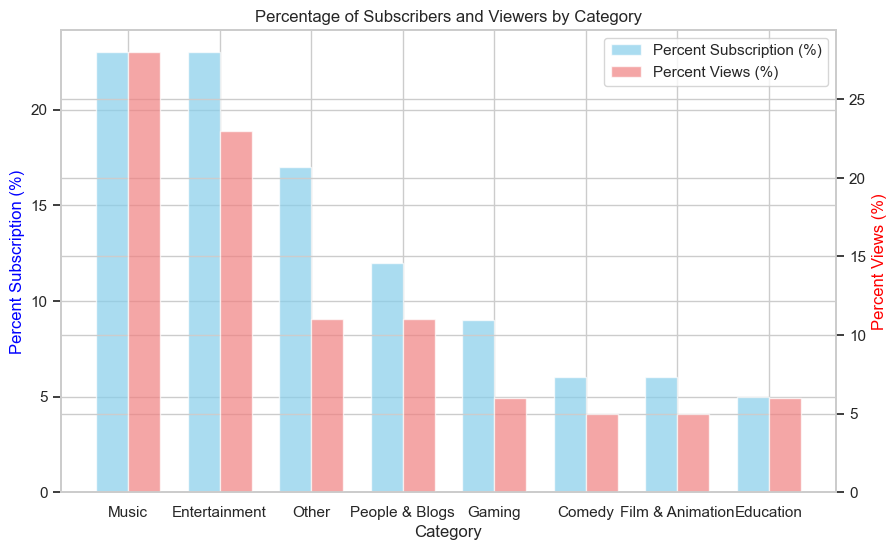

In [269]:
# Plotting the data

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35

# X-axis positions for each category
categories = np.arange(len(merged_df['Category']))

# Bar for Subscribers (million)
bar1 = ax1.bar(categories - bar_width/2, merged_df['Percent Subscription (%)'], bar_width, color='skyblue', label='Percent Subscription (%)', alpha=0.7)

# Creating a secondary y-axis for Video Views
ax2 = ax1.twinx()
bar2 = ax2.bar(categories + bar_width/2, merged_df['Percent Views (%)'], bar_width, color='lightcoral', label='Percent Views (%)', alpha=0.7)

# Labeling
ax1.set_ylabel('Percent Subscription (%)', color='blue')
ax2.set_ylabel('Percent Views (%)', color='red')

ax1.set_xlabel('Category')
ax1.set_title('Percentage of Subscribers and Viewers by Category')

# Adjust x-axis ticks and labels
ax1.set_xticks(categories)
ax1.set_xticklabels(merged_df['Category'])

# Add legends
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax1.legend(bars, labels, loc='upper right')

# Show the plot
plt.show()

### 1.2.2 Trends in Channel creation by year

In [270]:
channels_created_by_year = df_channel.groupby(['Created Year', 'Category'])['Youtuber'].count().reset_index().sort_values(by='Youtuber', ascending= False).drop_duplicates(subset='Created Year').sort_values(by='Created Year')
channels_created_by_year.reset_index(drop= True, inplace=True)
channels_created_by_year

,Created Year,Category,Youtuber
0,2005,Music,9
1,2006,Entertainment,22
2,2007,Music,17
3,2008,Music,15
4,2009,Music,24
5,2010,Music,18
6,2011,Music,23
7,2012,Music,18
8,2013,Entertainment,19
9,2014,Entertainment,20


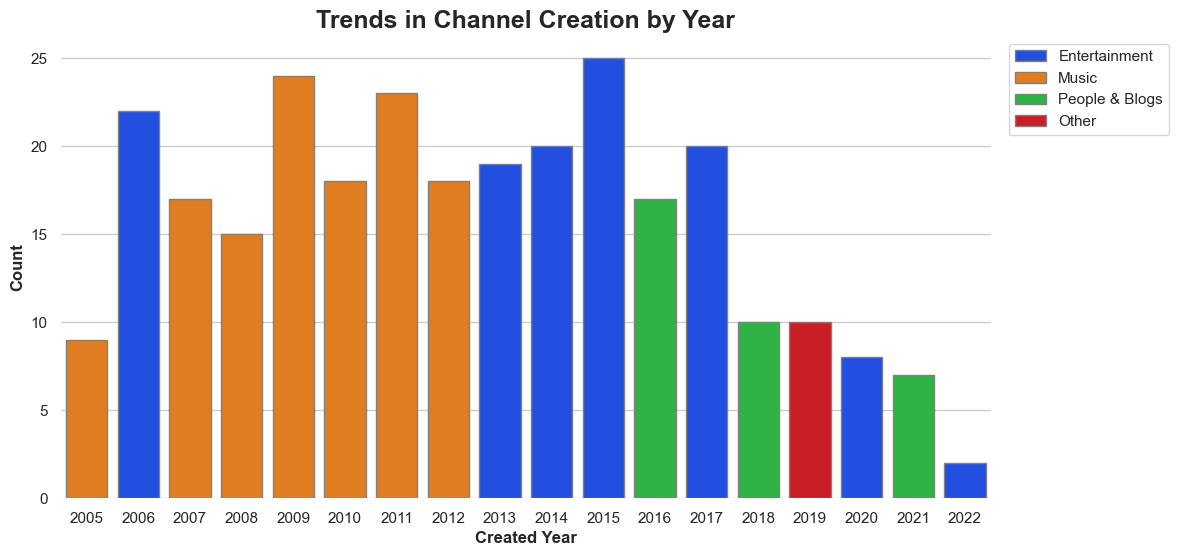

In [271]:
#Visualizing the trends in channel creation
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))

# Plotting using Seaborn
sns.barplot(
    data=top_cnt_channel_by_year,
    x='Created Year',
    y='Youtuber',
    hue='Category',
    dodge=False,
    palette='bright',  
    edgecolor='grey'   
)

# Add title and labels
plt.title('Trends in Channel Creation by Year', fontweight='heavy', fontsize=18)
plt.xlabel('Created Year', fontweight='heavy', fontsize=12)
plt.ylabel('Count', fontweight='heavy', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Removing unnecessary spines
sns.despine(left=True, bottom=True)

# specifying the location of legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

### 1.2.3 Regression Analysis on the subscribers

In [272]:
df_regx = df_channel[df_channel['Country'] == 'United States']
df_regx = df_regx.replace('nan', pd.NA)
df_regx = df_regx.rename(columns = {'Created Year' : 'created_year', 'Video Views': 'video_views','Video Views For The Last 30 Days': 'video_views_for_the_last_30_days' })
df_regx.head()
df_regx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 1 to 984
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Youtuber                          312 non-null    object 
 1   Subscribers                       312 non-null    int64  
 2   video_views                       312 non-null    int64  
 3   Uploads                           312 non-null    int64  
 4   Category                          312 non-null    object 
 5   Abbreviation                      312 non-null    object 
 6   created_year                      312 non-null    int64  
 7   Country                           312 non-null    object 
 8   video_views_for_the_last_30_days  305 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 24.4+ KB


In [273]:
df_regx['log_subscribers'] = np.log(df_regx['Subscribers'])
df_regx['log_video_views'] = np.log(df_regx['video_views'])
df_regx['log_video_views_30_days'] = np.log(df_regx['video_views_for_the_last_30_days'])
df_regx.head()

,Youtuber,Subscribers,video_views,Uploads,Category,Abbreviation,created_year,Country,video_views_for_the_last_30_days,log_subscribers,log_video_views,log_video_views_30_days
1,YouTube Movies,170000000,11148817171,1,Film & Animation,US,2006,United States,1.200000e+01,18.951309,23.134599,2.484907
2,MrBeast,166000000,28368841870,741,Entertainment,US,2012,United States,1.348000e+09,18.927498,24.068557,21.021888
3,Cocomelon - Nursery Rhymes,162000000,164000000000,966,Education,US,2006,United States,1.975000e+09,18.903107,25.823132,21.403834
6,Kids Diana Show,112000000,93247040539,1111,People & Blogs,US,2015,United States,7.316740e+08,18.534009,25.258518,20.410846
9,Vlad and Niki,98900000,77180169894,574,Entertainment,US,2018,United States,5.805740e+08,18.409620,25.069408,20.179528


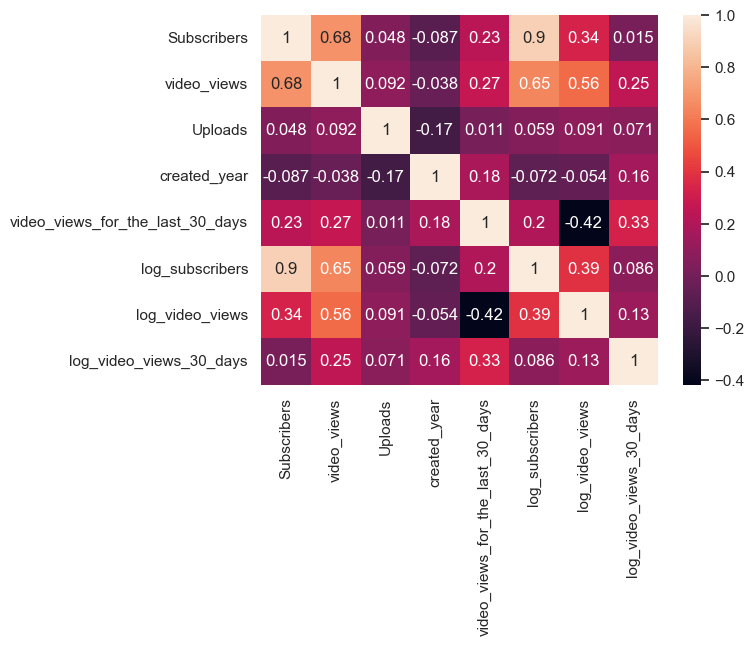

In [274]:
# Plotting a correlation matrix to find correlation
corr_matrix = df_regx.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [275]:

lin_model = smf.ols(formula = 'Subscribers ~ video_views + video_views_for_the_last_30_days + created_year', data = df_regx)
results = lin_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     90.29
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           1.08e-41
Time:                        22:55:04   Log-Likelihood:                -5446.8
No. Observations:                 305   AIC:                         1.090e+04
Df Residuals:                     301   BIC:                         1.092e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [276]:
lin_model = smf.ols(formula = 'log_subscribers ~ video_views + video_views_for_the_last_30_days + created_year', data = df_regx)
results = lin_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        log_subscribers   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     73.69
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           9.17e-36
Time:                        23:00:04   Log-Likelihood:                -106.59
No. Observations:                 305   AIC:                             221.2
Df Residuals:                     301   BIC:                             236.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

### 2. Video Level Data Analysis

In [221]:
df_video = pd.read_csv("US_youtube_trending_data.csv")

### 2.1 Data Preprocessing

In [222]:
# Data exploration
df_video.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,Category Name,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,People & Blogs,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,Gaming,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,Entertainment,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,Music,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,Howto & Style,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [223]:
#removing special characters from data in the title
pattern = r'[^a-zA-Z0-9\s.,!?&\'-]'
df_video['title'] = df_video['title'].apply(lambda x: re.sub(pattern, '', x)) 
df_video['title'] = df_video['title'].str.strip() 
df_video['title'] = df_video['title'].str.lstrip('- ') 

In [224]:
df_video = df_video.astype({
    'description' : 'str'
})
df_video = df_video[df_video['Category Name'] != "Nonprofits & Activism"]

In [225]:
df_video.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241667 entries, 0 to 241786
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           241667 non-null  object
 1   title              241667 non-null  object
 2   publishedAt        241667 non-null  object
 3   channelId          241667 non-null  object
 4   channelTitle       241667 non-null  object
 5   categoryId         241667 non-null  int64 
 6   Category Name      241667 non-null  object
 7   trending_date      241667 non-null  object
 8   tags               241667 non-null  object
 9   view_count         241667 non-null  int64 
 10  likes              241667 non-null  int64 
 11  dislikes           241667 non-null  int64 
 12  comment_count      241667 non-null  int64 
 13  thumbnail_link     241667 non-null  object
 14  comments_disabled  241667 non-null  bool  
 15  ratings_disabled   241667 non-null  bool  
 16  description        2

### 2.2 Data Analysis on video statistics

### 2.2.1 Average Number of days to trend by Month

In [226]:
# Convert 'publishedAt' and 'trending_date' to datetime
df_video['publishedAt'] = pd.to_datetime(df_video['publishedAt']).copy()
df_video['trending_date'] = pd.to_datetime(df_video['trending_date']).copy()

# Exclude data for November and December 2023
df_filtered = df_video[~((df_video['publishedAt'].dt.year == 2023) & ((df_video['publishedAt'].dt.month == 11) | (df_video['publishedAt'].dt.month == 12)))]

# Calculate the number of days to trend
df_filtered['days_to_trend'] = (df_video['trending_date'] - df_video['publishedAt']).dt.days

# Group by month and calculate the monthly averages
monthly_avg = df_filtered.groupby(df_filtered['publishedAt'].dt.to_period("M"))['days_to_trend'].mean().reset_index()



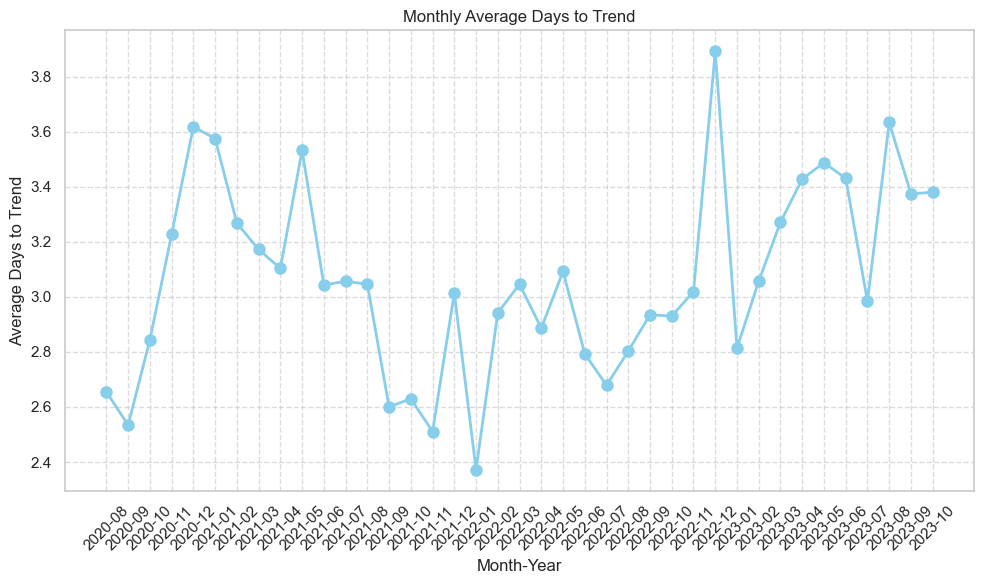

In [243]:
# Plotting a graph to visualize the find average number of days to trend by month
plt.figure(figsize=(10, 6))

plt.plot(monthly_avg['publishedAt'].astype(str), monthly_avg['days_to_trend'], marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)

plt.title('Monthly Average Days to Trend')
plt.xlabel('Month-Year')
plt.ylabel('Average Days to Trend')

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2.2.2 Common Words used in trending videos Excluding stop words

2.2.2.1 Common words used in title

In [229]:
# Combining all text into a single string
all_text = ' '.join(df_video['title'])

# Tokenize the text into words
words = word_tokenize(all_text)

# Filter out stop words example: a, an, the etc.
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = Counter(filtered_words)

# Get the most common words and their counts
top_words = word_counts.most_common(10)  

# Separate words and counts for plotting
words, counts = zip(*top_words)



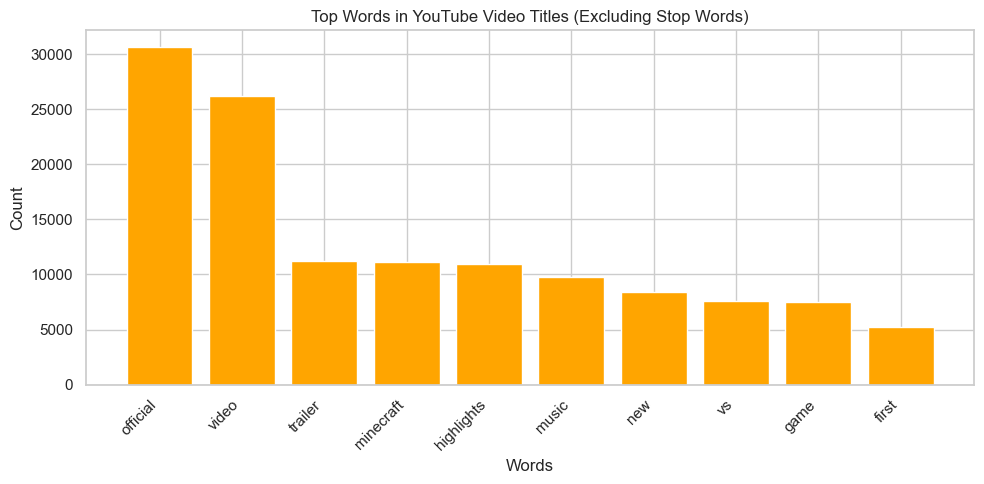

In [230]:
# Plotting the graph

plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='Orange')
plt.title('Top Words in YouTube Video Titles (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Count')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

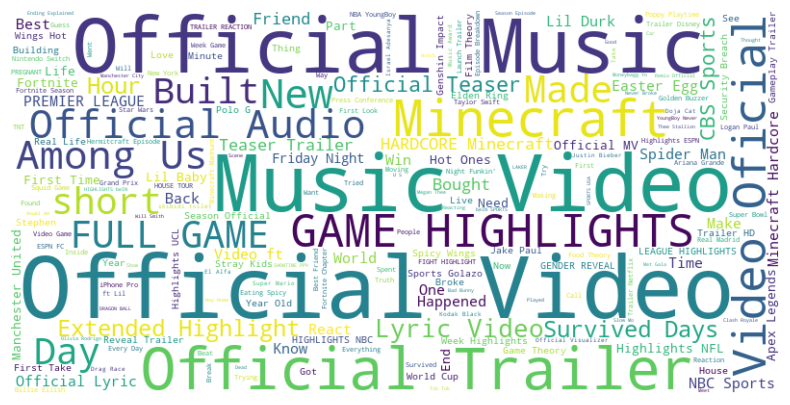

In [231]:
#Word cloud for the top words used int the titles of trending videos
# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Common words used in description

In [232]:
# Combine all text into a single string
desc_text = ' '.join(df_video['description'])


# Tokenize the text into words
desc_words = word_tokenize(desc_text)

# Filter out stop words
filtered_words = [word.lower() for word in desc_words if word.isalpha() and word.lower() not in stop_words]

# Count the occurrences of each word
desc_word_counts = Counter(filtered_words)

# Get the most common words and their counts
top_words = desc_word_counts.most_common(10)  

# Separate words and counts for plotting
desc_words, counts = zip(*top_words)




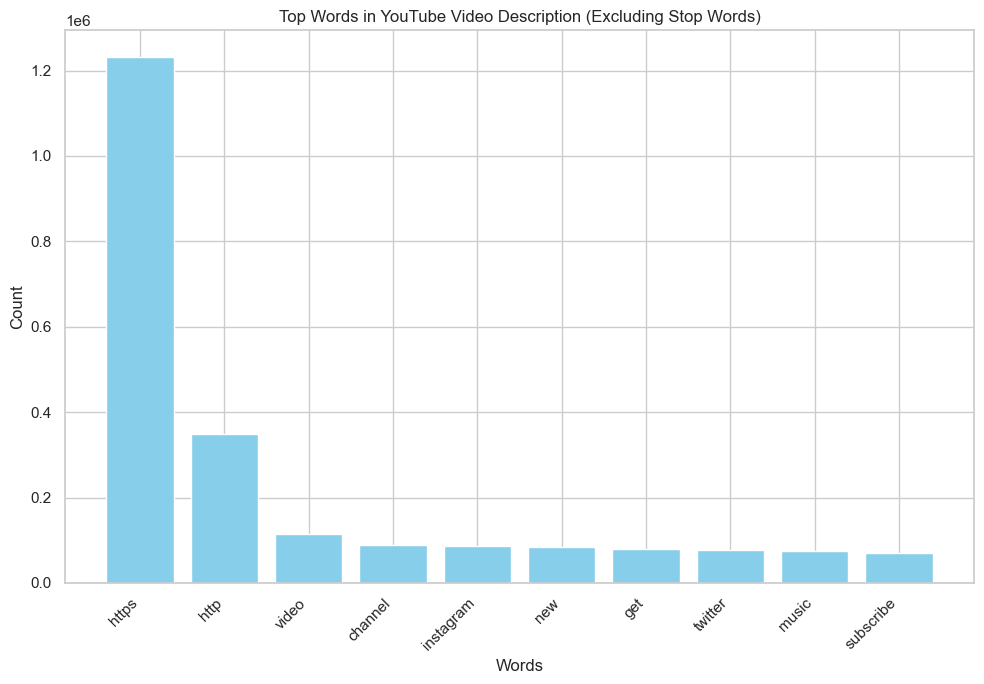

In [233]:
# Plot the bar graph
plt.figure(figsize=(10, 7))
plt.bar(desc_words, counts, color='skyblue')  # Fix the variable name here
plt.title('Top Words in YouTube Video Description (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

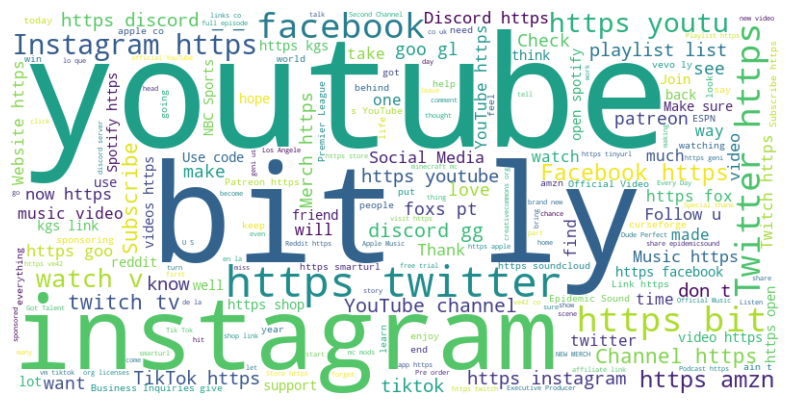

In [234]:
#Creating word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(desc_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2.2.3 Time at which the trending videos were uploaded

In [42]:
df_video["publishing_hour"] = df_video["publishedAt"].apply(lambda x: x[11:13])
df_video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241787 entries, 0 to 241786
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           241787 non-null  object
 1   title              241787 non-null  object
 2   publishedAt        241787 non-null  object
 3   channelId          241787 non-null  object
 4   channelTitle       241787 non-null  object
 5   categoryId         241787 non-null  int64 
 6   Category Name      241787 non-null  object
 7   trending_date      241787 non-null  object
 8   tags               241787 non-null  object
 9   view_count         241787 non-null  int64 
 10  likes              241787 non-null  int64 
 11  dislikes           241787 non-null  int64 
 12  comment_count      241787 non-null  int64 
 13  thumbnail_link     241787 non-null  object
 14  comments_disabled  241787 non-null  bool  
 15  ratings_disabled   241787 non-null  bool  
 16  description        2

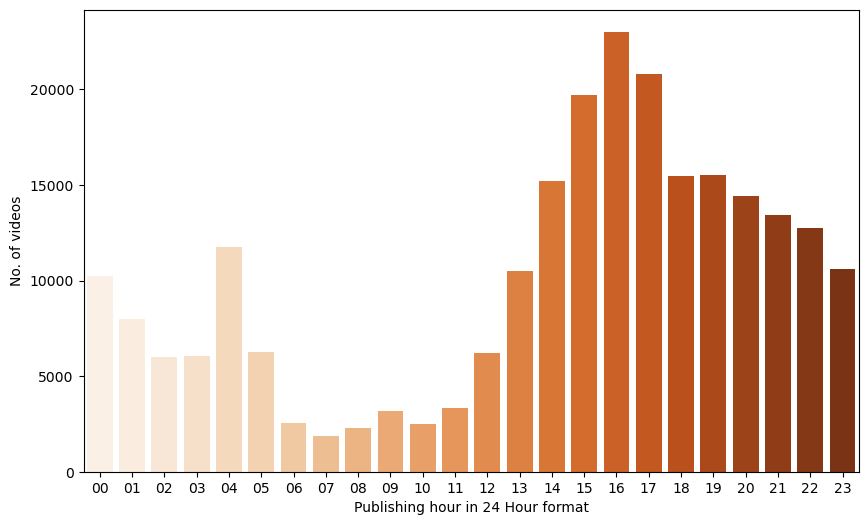

In [47]:
# Create a DataFrame for plotting
df_video_upload = df_video["publishing_hour"].value_counts().to_frame().reset_index().rename(
    columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"}
).sort_values(by='publishing_hour')

# Set the background color of the entire graph area
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')  
ax.set_facecolor('white')         

# Plot the bar chart with a custom color palette
sns.barplot(x="publishing_hour", y="No_of_videos", data=df_video_upload, palette="Oranges", ax=ax)
# Customize other plot elements
ax.set(xlabel="Publishing hour in 24 Hour format", ylabel="No. of videos")
ax.tick_params(axis='both', colors='black')  
ax.xaxis.label.set_color('black')  
ax.yaxis.label.set_color('black')  
ax.title.set_color('black')  

plt.show()

### 2.2.4 Categories in which the comments and ratings were disabled

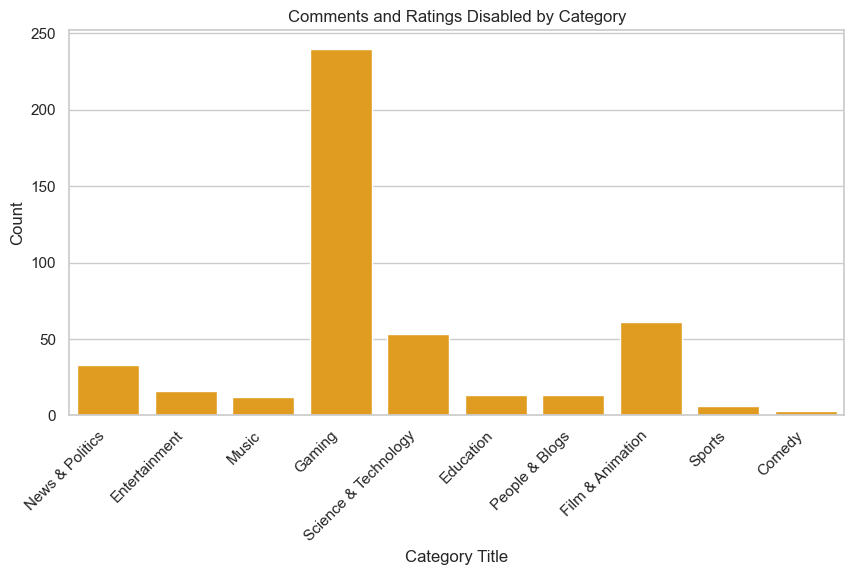

In [245]:
# Create a data frame with comments and ratings disabled
df_cmts_ratings = df_video[(df_video['comments_disabled'] == True) & (df_video['ratings_disabled'] == True)]

# Create a bar plot to visualize the count of channels in each category with both comments and rating disabled
plt.figure(figsize=(10, 5))
sns.countplot(x='Category Name', data=df_cmts_ratings, color='Orange')
plt.title('Comments and Ratings Disabled by Category')
plt.xlabel('Category Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()